# Wavelength Mapping

This notebook contains illustrations of how various wavelengths are mapped to different pixels within the detector.

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from sunpy.coordinates import Helioprojective, get_horizons_coord
from astropy.wcs.utils import pixel_to_pixel

from mocksipipeline.detector.response import SpectrogramChannel
from overlappy.wcs import overlappogram_fits_wcs, pcij_matrix

In [2]:
line_ids = [
    #('Fe XVIII',14.21*u.angstrom),  # also targeted by MaGIXS
    ('Fe XVII', 15.01*u.angstrom),  # also targeted by MaGIXS
    ('Fe XVII', 16.78*u.AA),
    ('Fe XVII', 17.05*u.AA),
    ('O VII', 21.60*u.angstrom),  # also targeted by MaGIXS
    ('O VII', 21.81*u.angstrom),
    ('O VII', 22.10*u.AA),
    ('O VIII', 18.97*u.angstrom),  # also targeted by MaGIXS
    #('Fe XXV', 1.86*u.AA),
    #('Ca XIX', 3.21*u.AA),
    ('Si XIII', 6.74*u.AA),
    #('Mg XI', 9.32*u.AA),
    ('Fe XVII', 11.25*u.AA),
    #('Fe XX', 12.83*u.AA),
    #('Ne IX', 13.45*u.AA),
    #('Fe XIX', 13.53*u.AA),
    #('C VI', 33.73*u.AA),
    #('C V', 40.27*u.AA),
    ('Si XII', 44.16*u.AA),
    ('Si XI', 49.18*u.AA),
]

In [3]:
def add_line_ids_to_axis(ax, line_ids):
    for ion,line in line_ids:
        ax.axvline(x=line.to_value('Angstrom'), ls=':', color='k',)
    ax2 = ax.secondary_xaxis('top') 
    ax2.set_xticks(u.Quantity([l for _,l in line_ids]).to_value('Angstrom'),
                   labels=[f'{ion}, {line.to_string(format="latex_inline")}' for ion,line in line_ids],
                   rotation=90,
                   horizontalalignment='center',
                   #verticalalignment='center'
                  )

First, we are going to define a WCS for the 0th order and the 1st order

In [4]:
chan_0 = SpectrogramChannel(0, [])
chan_1 = SpectrogramChannel(1, [])
chan_3 = SpectrogramChannel(3, [])
chan_m1 = SpectrogramChannel(-1, [])
chan_m3 = SpectrogramChannel(-3, [])

In [5]:
observer = get_horizons_coord('SDO', '2020-11-09 18:00:00')
hpc_frame = Helioprojective(observer=observer, obstime=observer.obstime)

INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spac [sunpy.coordinates.ephemeris]


In [6]:
wcs0 = overlappogram_fits_wcs(
    chan_0.detector_shape,
    chan_0.wavelength,
    (chan_0.resolution[0], chan_0.resolution[1], chan_0.spectral_resolution),
    reference_pixel=chan_0.reference_pixel,
    reference_coord=(0*u.arcsec, 0*u.arcsec,0*u.angstrom),
    pc_matrix=pcij_matrix(-90*u.deg, 0*u.deg, order=chan_0.spectral_order, dispersion_axis=0),
    observer=observer,
)
wcs1 = overlappogram_fits_wcs(
    chan_1.detector_shape,
    chan_1.wavelength,
    (chan_1.resolution[0], chan_1.resolution[1], chan_1.spectral_resolution),
    reference_pixel=chan_1.reference_pixel,
    reference_coord=(0*u.arcsec, 0*u.arcsec,0*u.angstrom),
    pc_matrix=pcij_matrix(-90*u.deg, 0*u.deg, order=chan_1.spectral_order, dispersion_axis=0),
    observer=observer,
)
wcs3 = overlappogram_fits_wcs(
    chan_3.detector_shape,
    chan_3.wavelength,
    (chan_3.resolution[0], chan_3.resolution[1], chan_3.spectral_resolution),
    reference_pixel=chan_3.reference_pixel,
    reference_coord=(0*u.arcsec, 0*u.arcsec,0*u.angstrom),
    pc_matrix=pcij_matrix(-90*u.deg, 0*u.deg, order=chan_3.spectral_order, dispersion_axis=0),
    observer=observer,
)
wcsm1 = overlappogram_fits_wcs(
    chan_m1.detector_shape,
    chan_m1.wavelength,
    (chan_m1.resolution[0], chan_m1.resolution[1], chan_m1.spectral_resolution),
    reference_pixel=chan_m1.reference_pixel,
    reference_coord=(0*u.arcsec, 0*u.arcsec, 0*u.angstrom),
    pc_matrix=pcij_matrix(-90*u.deg, 0*u.deg, order=chan_m1.spectral_order, dispersion_axis=0),
    observer=observer,
)
wcsm3 = overlappogram_fits_wcs(
    chan_m3.detector_shape,
    chan_m3.wavelength,
    (chan_m3.resolution[0], chan_m3.resolution[1], chan_m3.spectral_resolution),
    reference_pixel=chan_m3.reference_pixel,
    reference_coord=(0*u.arcsec, 0*u.arcsec, 0*u.angstrom),
    pc_matrix=pcij_matrix(-90*u.deg, 0*u.deg, order=chan_m3.spectral_order, dispersion_axis=0),
    observer=observer,
)

  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]


In [7]:
#ar_coord = SkyCoord(Tx=[100]*u.arcsec, Ty=[-450]*u.arcsec, frame=hpc_frame)
#ar_coord = SkyCoord(Tx=[0]*u.arcsec, Ty=[0]*u.arcsec, frame=hpc_frame)
ar_coord = SkyCoord(Tx=[0]*u.arcsec, Ty=[900]*u.arcsec, frame=hpc_frame)
ar_coord_x_pix, ar_coord_y_pix, _ = ar_coord_pixel = wcs0.world_to_pixel(ar_coord, 0*u.angstrom)

In [8]:
wave_indices = range(1300)
center_x_o0, _, _ = pixel_to_pixel(wcs0, wcs0, ar_coord_x_pix[0], ar_coord_y_pix[0], wave_indices)
center_x_o1, _, _ = pixel_to_pixel(wcs0, wcs1, ar_coord_x_pix[0], ar_coord_y_pix[0], wave_indices)
center_x_o3, _, _ = pixel_to_pixel(wcs0, wcs3, ar_coord_x_pix[0], ar_coord_y_pix[0], wave_indices)
center_x_om1, _, _ = pixel_to_pixel(wcs0, wcsm1, ar_coord_x_pix[0], ar_coord_y_pix[0], wave_indices)
center_x_om3, _, _ = pixel_to_pixel(wcs0, wcsm3, ar_coord_x_pix[0], ar_coord_y_pix[0], wave_indices)

In [9]:
_,wavelength = wcs0.pixel_to_world(*(chan_0.reference_pixel[:2]-1*u.pix).value, wave_indices)

Text(0, 0.5, 'Wavelength [Å]')

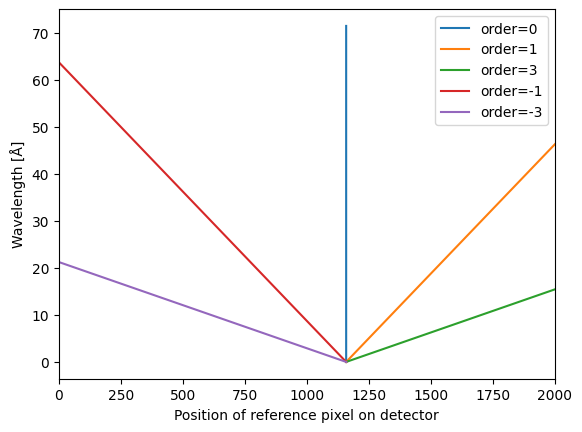

In [10]:
plt.plot(center_x_o0,wavelength.to('Angstrom'), label='order=0')
plt.plot(center_x_o1,wavelength.to('Angstrom'), label='order=1')
plt.plot(center_x_o3,wavelength.to('Angstrom'), label='order=3')
plt.plot(center_x_om1,wavelength.to('Angstrom'), label='order=-1')
plt.plot(center_x_om3,wavelength.to('Angstrom'), label='order=-3')
plt.xlim(0,chan_0.detector_shape[1])
plt.legend()
plt.xlabel('Position of reference pixel on detector')
plt.ylabel('Wavelength [Å]')

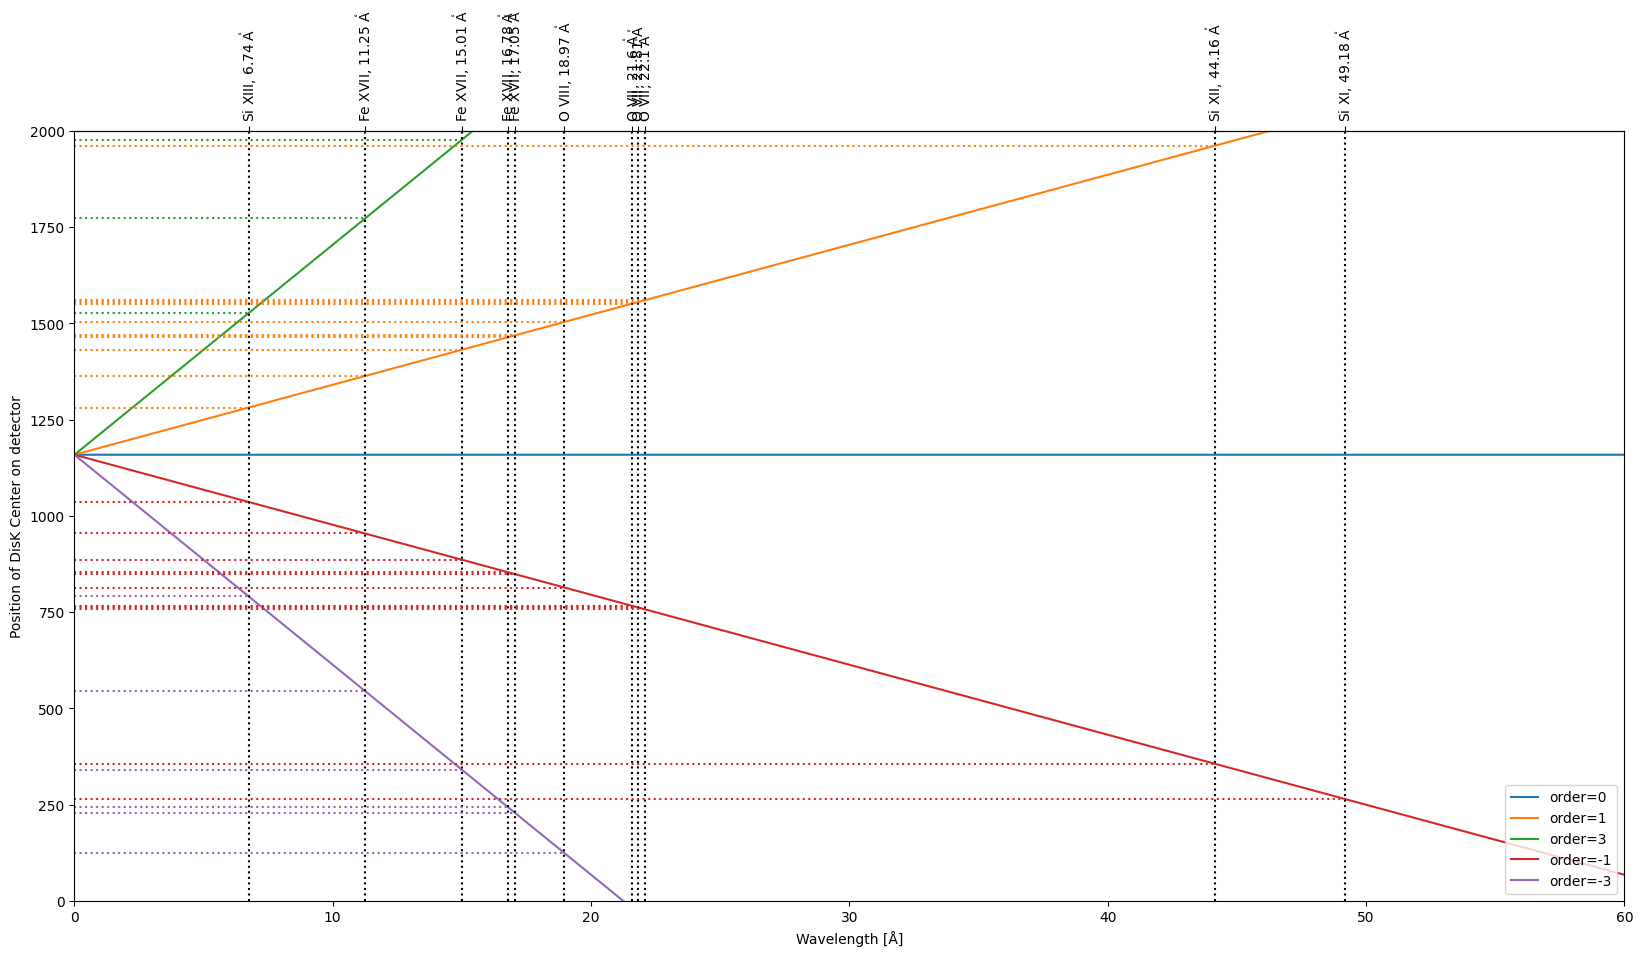

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(wavelength.to('Angstrom'),center_x_o0, label='order=0')
ax.plot(wavelength.to('Angstrom'),center_x_o1, label='order=1')
ax.plot(wavelength.to('Angstrom'),center_x_o3, label='order=3')
ax.plot(wavelength.to('Angstrom'),center_x_om1, label='order=-1')
ax.plot(wavelength.to('Angstrom'),center_x_om3, label='order=-3')
ax.set_ylim(0,chan_0.detector_shape[1])
ax.set_xlim(0,60)
ax.legend(loc=4)
ax.set_ylabel('Position of DisK Center on detector')
ax.set_xlabel('Wavelength [Å]')
add_line_ids_to_axis(ax, line_ids)
for ion,line in line_ids:
    #if ion in ('Fe XVII', 'O VII', 'O VIII'):
    pix_pos,_,_ = wcs1.world_to_pixel(ar_coord, line)
    ax.hlines(pix_pos, 0, line.to_value('Angstrom'), ls=':', color='C1')
    pix_pos,_,_ = wcs3.world_to_pixel(ar_coord, line)
    ax.hlines(pix_pos, 0, line.to_value('Angstrom'), ls=':', color='C2')
    pix_pos,_,_ = wcsm1.world_to_pixel(ar_coord, line)
    ax.hlines(pix_pos, 0, line.to_value('Angstrom'), ls=':', color='C3')
    pix_pos,_,_ = wcsm3.world_to_pixel(ar_coord, line)
    ax.hlines(pix_pos, 0, line.to_value('Angstrom'), ls=':', color='C4')

In [20]:
wavelength[np.where(center_x_o1>2000)[0][0]-1].to('Angstrom')

<SpectralCoord 
   (target: <Helioprojective Coordinate (obstime=2020-11-09T18:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2020-11-09T18:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
                (0.00600519, 3.43380431, 1.48126208e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, kpc)
                (0., 0., 1000.)
             (d_Tx, d_Ty, d_distance) in (arcsec / s, arcsec / s, km / s)
                (0., 0., 0.)>)
  46.255 Angstrom>

In [12]:
left_edge = SkyCoord(Tx=[0]*u.arcsec, Ty=[-1200]*u.arcsec, frame=hpc_frame)
right_edge = SkyCoord(Tx=[0]*u.arcsec, Ty=[1200]*u.arcsec, frame=hpc_frame)
center = SkyCoord(Tx=[0]*u.arcsec, Ty=[0]*u.arcsec, frame=hpc_frame)
wave_indices = range(1300)
_,wavelength = wcs0.pixel_to_world(*(chan_0.reference_pixel[:2]-1*u.pix).value, wave_indices)

(-500.0, 2500.0)

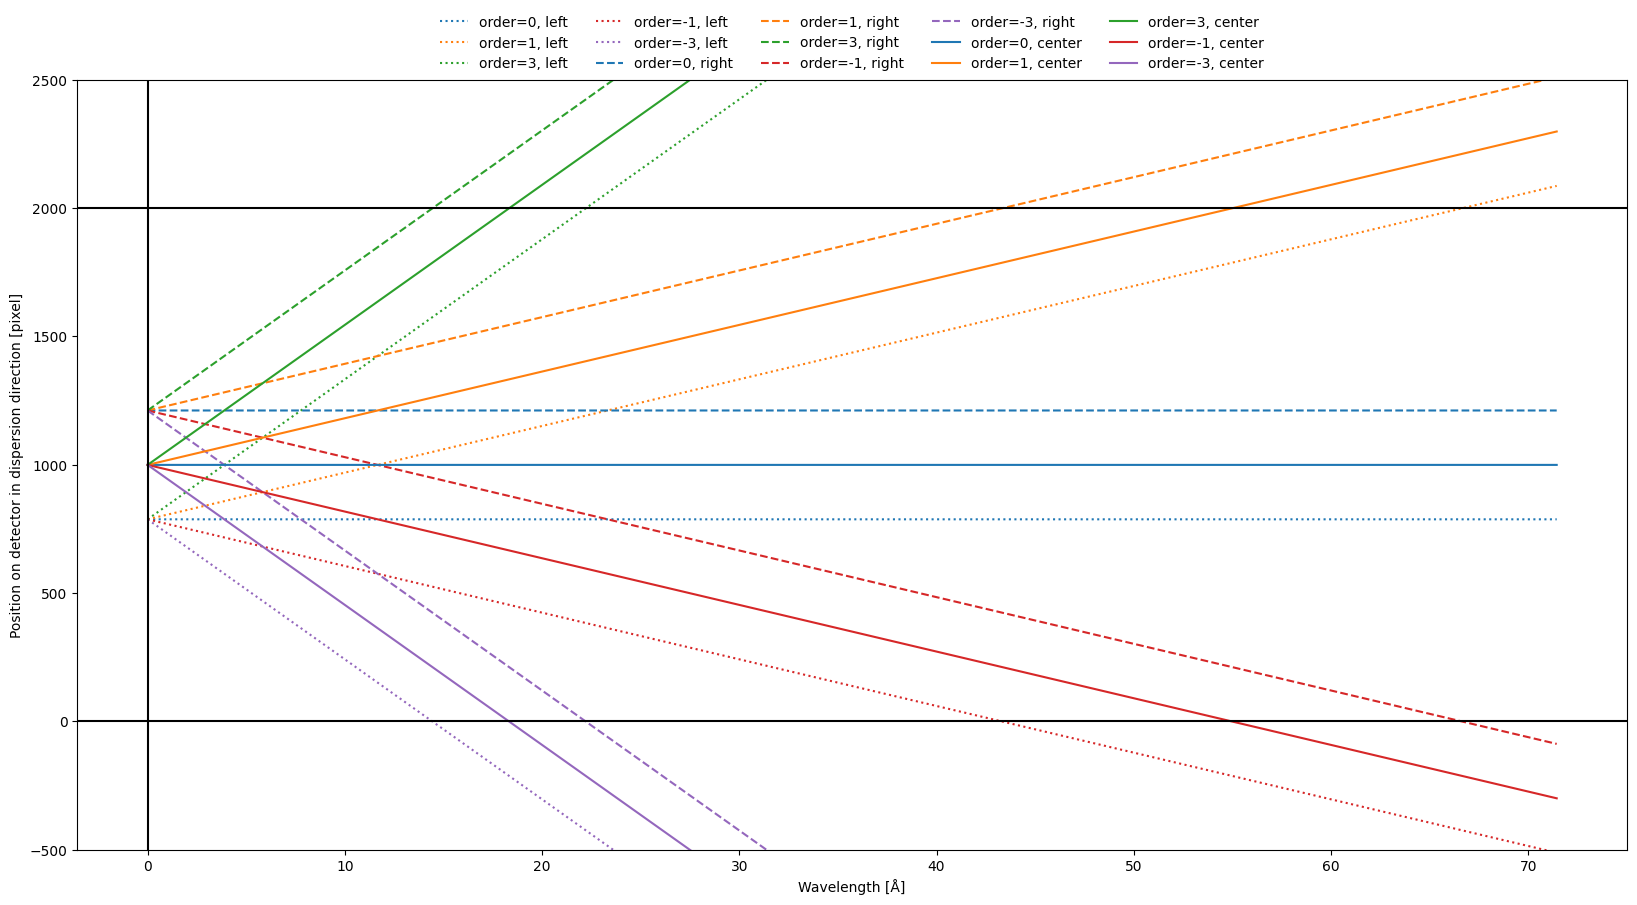

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for coord,lab,ls in [(left_edge,'left',':'), (right_edge, 'right','--'), (center, 'center', '-')]:
    # Find coordinates in pixel coordinates in the zeroth order image
    coord_x_pix, coord_y_pix, _ = wcs0.world_to_pixel(coord, 0*u.angstrom)
    # Map these pixel coordinates in zeroth order to the the dispersed orders for all wavelengths
    for i,(wcs_o, order) in enumerate([(wcs0, 0), (wcs1, 1), (wcs3, 3), (wcsm1, -1), (wcsm3, -3)]):
        center_x_o, _, _ = pixel_to_pixel(wcs0, wcs_o, coord_x_pix[0], coord_y_pix[0], wave_indices)
        # Plot position of the coord on the detector as a function of wavelength
        ax.plot(wavelength.to('Angstrom'), center_x_o, label=f'order={order}, {lab}', color=f'C{i}', ls=ls)
ax.axhline(y=0, ls='-', color='k')
ax.axhline(y=2000, ls='-', color='k')
ax.axvline(x=0, ls='-', color='k')
ax.legend(loc='upper center',ncol=5, bbox_to_anchor=(.5,1.1), frameon=False)
ax.set_ylabel('Position on detector in dispersion direction [pixel]')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylim(-500,2500)
#ax.set_xlim(60,70)